In [1]:

# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

dfdf


In [2]:
pwd = os.getcwd() 

This is to Explain all the things very well

<div>
<img src="output.png" width="700"/>
</div>

In [3]:
pwd

'c:\\Users\\ANKIT SHARMA\\Desktop\\Shashank kalanithi\\Python tutorial'

In [4]:
cities_db = pd.read_csv(pwd + "/indian Cities Database.csv")
cities_db

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra
...,...,...,...,...,...,...
208,Vizianagaram,18.113290,83.397743,India,IN,Andhra Pradesh
209,Warangal,17.978423,79.600209,India,IN,Telangana
210,Jorapokhar,23.700000,86.412670,India,IN,Jharkhand
211,Brajrajnagar,21.820000,83.920000,India,IN,Odisha


In [5]:
city_day = pd.read_csv( pwd + "/city_day.csv")
display(city_day.head(5))

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [6]:
#Missing values
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val,mis_val_percent] , axis = 1)

    # Rename the columns 
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values' , 1 : '% of Total Values'})

    #Sort the table by percentage of missing descending 
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0 ].sort_values(
        '% of Total Values' , ascending = False).round(1)
    
    #Print some summary information
    print('Your selected dataframe has' + str(df.shape[1]) + 'columns.\n' 
    'There are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values.')

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values = missing_values_table(city_day)
missing_values.style.background_gradient(cmap = 'Reds')



Your selected dataframe has16columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16807,64.100000
PM10,10766,41.100000
NH3,9847,37.600000
Toluene,7555,28.800000
Benzene,5287,20.200000
PM2.5,4289,16.400000
AQI,4282,16.300000
AQI_Bucket,4282,16.300000
NOx,4043,15.400000
O3,3660,14.000000


In [7]:
# cities in dataset

cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 24
Index(['Ahmedabad', 'Bengaluru', 'Mumbai', 'Lucknow', 'Chennai', 'Delhi',
       'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jorapokhar', 'Jaipur',
       'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata',
       'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi',
       'Aizawl'],
      dtype='object')


In [8]:
# Convert string to datetime64

city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace = True)

In [11]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-05-01 00:00:00


In [9]:
city_day['BTX'] = city_day['Benzene'] + city_day['Toluene'] + city_day['Xylene']
city_day.drop(['Benzene' , 'Toluene' , 'Xylene'] , axis = 1)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN,0.02
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN,12.95
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN,25.45
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN,15.57
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN,28.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.65,0.49,5.50,42.41,63.0,Satisfactory,NaN
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.73,0.44,5.62,44.55,60.0,Satisfactory,NaN
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.93,0.51,5.52,38.97,57.0,Satisfactory,NaN
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.84,0.46,5.32,39.23,57.0,Satisfactory,NaN


In [10]:
# combining the PM2.5 andPM10 into one column - Particulate Matter
city_day['Particulate_Matter'] = city_day['PM2.5'] + city_day['PM10']

In [11]:
# Subsetting columns
# Even though a lot of columns have been provided in the dataset , we shall select a few prominent ones . 
# So a new dataframe is created containing the major pollutants responsible for air pollution 
pollutants = ['PM2.5' , 'PM10' , 'NO2' , 'CO' , 'SO2' , 'O3' , 'BTX']

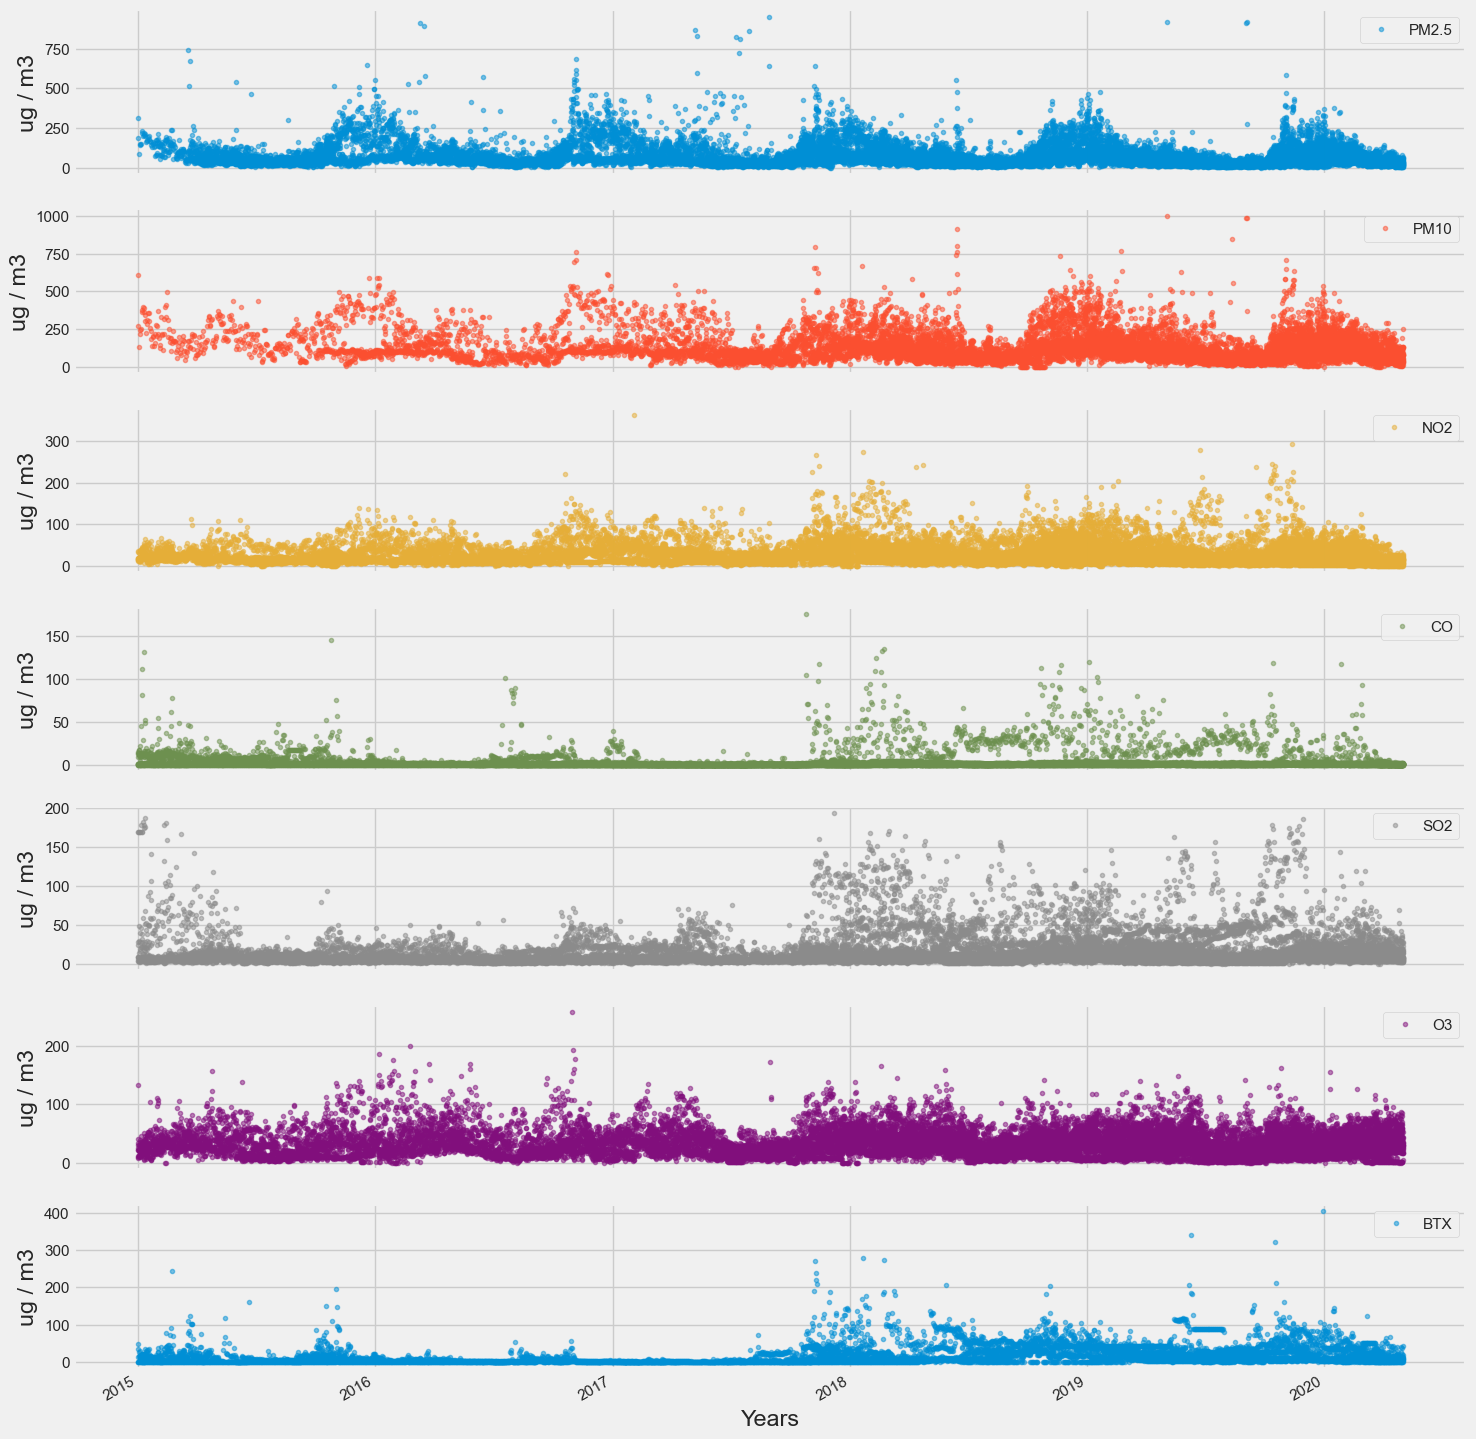

In [12]:
# Visualizing the data as dots instead of lines since with so many datapoints , the line plot will become crowded and will be hard to read.

city_day.set_index('Date' , inplace = True)
axes = city_day[pollutants].plot(marker = '.' , alpha = 0.5 , linestyle = 'None' , figsize = (16,20) , subplots = True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')


In [13]:
def trend_plot(dataframe,value):

    #Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    #Draw Plot
    fig , axes = plt.subplots(1,2 , figsize = (14,6) , dpi = 80)
    sns.boxplot(x= 'year', y=value,data = df , ax = axes[0])
    sns.pointplot(x = 'month' , y = value , data = df.loc[~df.year.isin([2015,2020]), :])

    #Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)' , fontsize = 18);
    axes[1].set_title('Month-wise Plot \n(The Seasonality)' , fontsize = 18)
    plt.show()

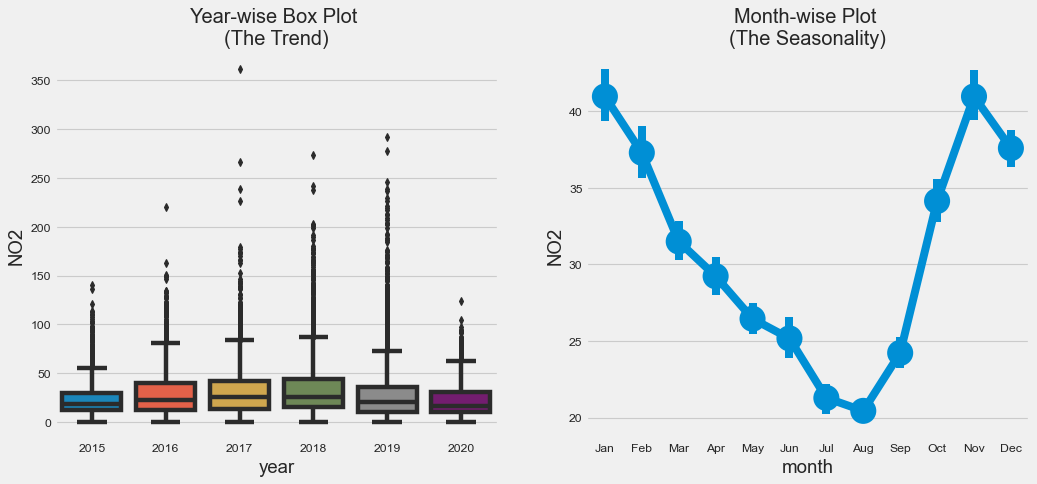

In [14]:
city_day.reset_index(inplace = True)
df = city_day.copy()
value = 'NO2'
trend_plot(df,value)

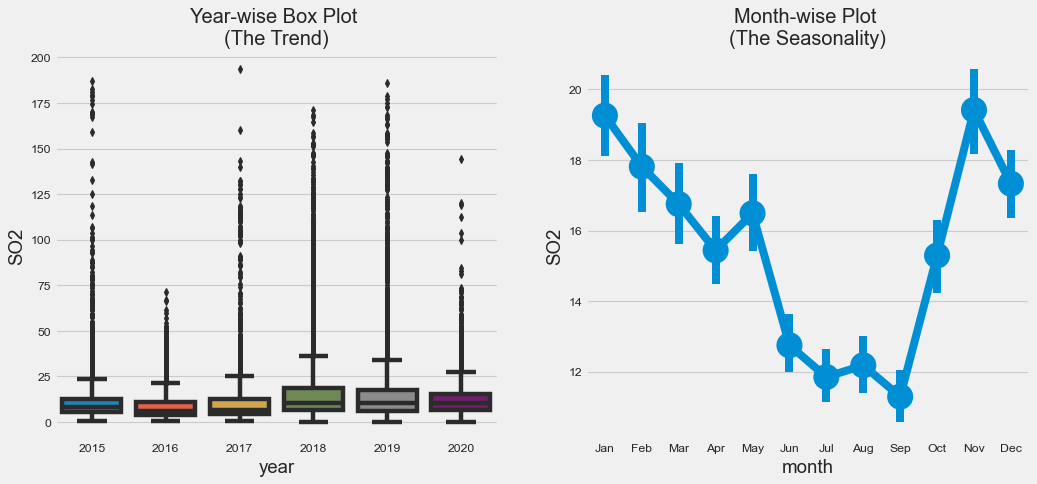

In [29]:
#city_day.reset_index(inplace = True)
df = city_day.copy()
value = 'SO2'
trend_plot(df,value)

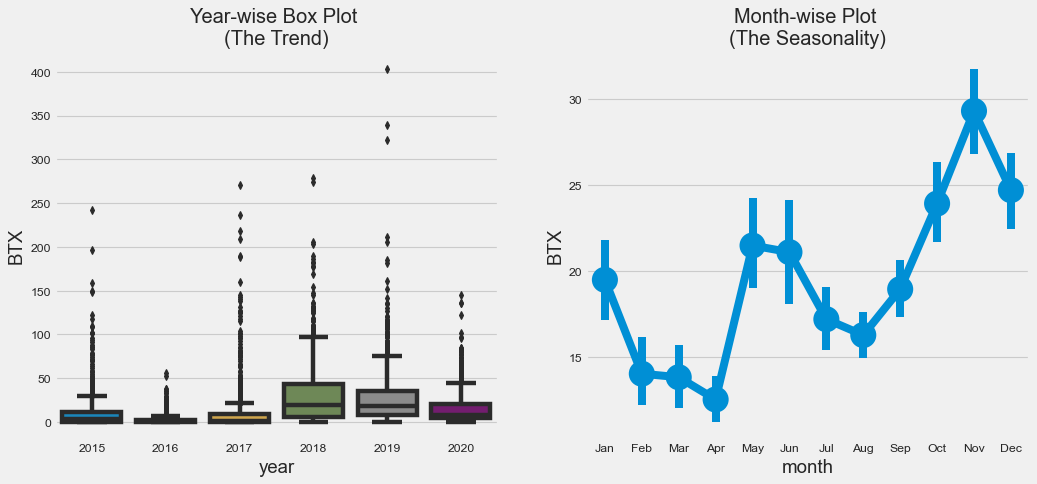

In [30]:
value = 'BTX'
trend_plot(df,value)

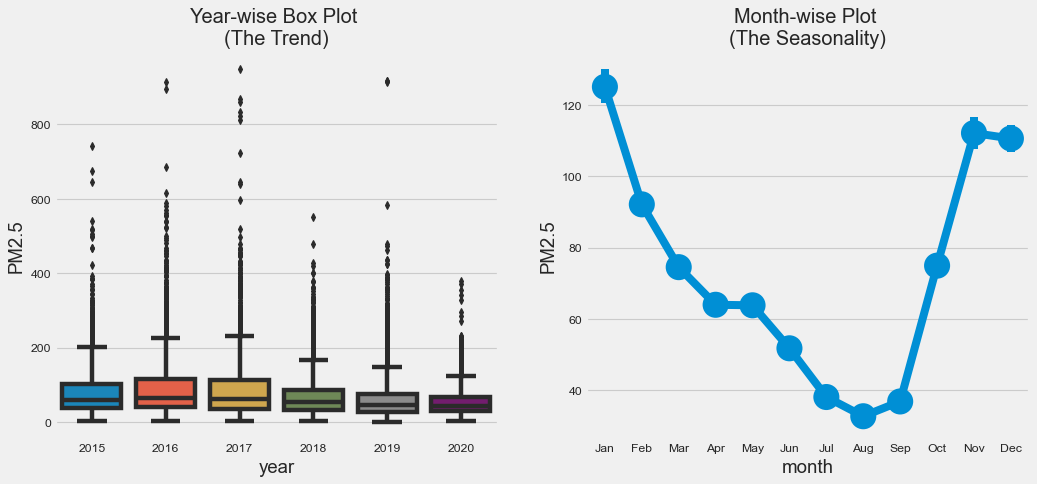

In [31]:
value = 'PM2.5'
trend_plot(df,value)

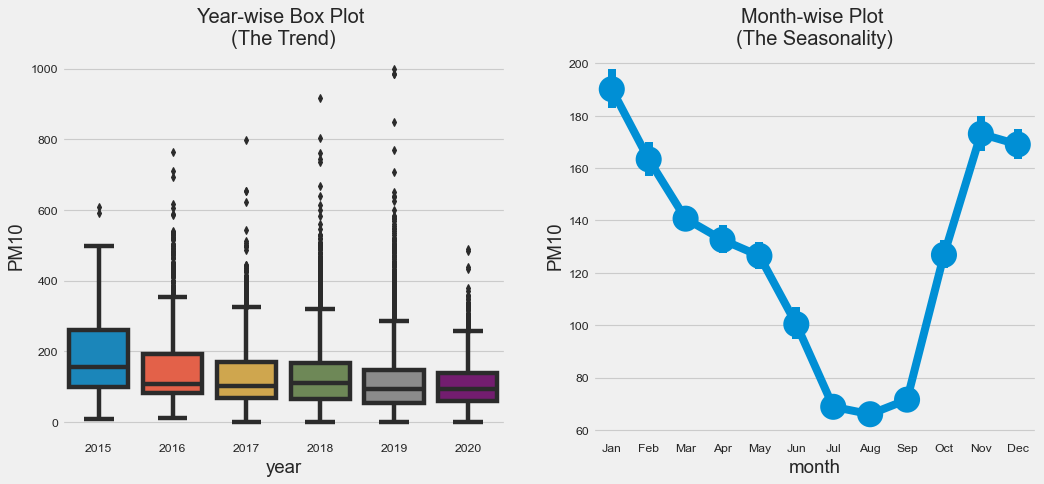

In [32]:
value = 'PM10'
trend_plot(df,value)

In [16]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant , 'City']].groupby(['City']).mean().sort_values(by = pollutant , ascending = False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap = 'OrRd')

In [17]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.render()
    display_html(html_str.replace('table', 'table style  = "display:inline"'),raw = True)

In [18]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')

display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

,City,PM2.5
0,Patna,127.480000
1,Gurugram,119.800000
2,Delhi,119.270000
3,Lucknow,111.630000
4,Ahmedabad,69.660000
5,Guwahati,69.560000
6,Kolkata,68.690000
7,Jorapokhar,65.900000
8,Brajrajnagar,63.880000
9,Talcher,63.740000


In [19]:
# after ' conda install nbformat ' i had to restart the vsc code . otherwise it was not working
x2 = city_day[['PM2.5' , 'City']].groupby(['City']).median().sort_values(by = 'PM2.5',ascending = False).reset_index()
x3 = city_day[['PM10','City']].groupby(['City']).median().sort_values(by = 'PM10',ascending = False).reset_index()

from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1 , cols=2,
    subplot_titles = ('PM2.5','PM10'))

fig.add_trace(go.Bar(y = x2['PM2.5'], x=x2['City'],
marker = dict(color = x2['PM2.5'],coloraxis = 'coloraxis')),1,1)

fig.add_trace(go.Bar(y = x3['PM10'], x =x2['City'], marker = dict(color = x2['PM2.5'],coloraxis = "coloraxis")),1,2)

fig.update_layout(coloraxis = dict(colorscale= 'reds'),showlegend = False,plot_bgcolor = 'white')
fig.update_xaxes(ticks = 'outside' , tickwidth = 2 , tickangle = 45 , tickcolor = 'crimson' , ticklen = 10,title_text = 'cities')
fig.update_yaxes(title_text = 'ug / m3' , row = 1 , col = 1)
fig.update_yaxes(title_text = 'ug / m3' , row = 1 , col = 2)
fig.show()


In [20]:
x4= city_day[['CO','City']].groupby(["City"]).median().sort_values(by='CO',ascending=False).reset_index()
x5 = city_day[['NO2','City']].groupby(["City"]).median().sort_values(by='NO2',ascending=False).reset_index()
x6 = city_day[['SO2','City']].groupby(["City"]).median().sort_values(by='SO2',ascending=False).reset_index()


from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("CO","NO2",'SO2'))

fig.add_trace(go.Bar( y=x4['CO'], x=x4["City"],  
                     marker=dict(color=x4['CO'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x5['NO2'], x=x5["City"],  
                     marker=dict(color=x5['NO2'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar( y=x6['SO2'], x=x5["City"],  
                     marker=dict(color=x6['SO2'], coloraxis="coloraxis")),
              1, 3)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()

In [21]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe


In [22]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

In [24]:
#AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
#bcr_html = bcr.bar_chart_race(df=AQI_2020, filename=None, period_length=300,orientation='v',figsize=(8, 6),bar_label_size=7,tick_label_size=7,title='AQI levels in 2020')
#HTML(bcr_html)

In [1]:
print('hello')

hello
